In [19]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

# 1. Gather PNG filenames from MPT/resource folder
def gather_png_filenames(root_folder):
    png_game_files = []
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith("_game.png"):
                png_game_files.append(os.path.join(root, file))
    return png_game_files

resource_folder = r'MPT\\levels'

png_game_files = gather_png_filenames(resource_folder)
print( len(png_game_files), png_game_files[0] )

# 2. Load source images
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append((path, img))
        else:
            print(f'error : {path}')
    return images

map_source_images = load_images(png_game_files)
print(len(map_source_images), len(map_source_images[0]), np.array(map_source_images[3][1]).shape)

119 MPT\\levels\lv100_game.png
119 2 (1600, 900, 3)


10


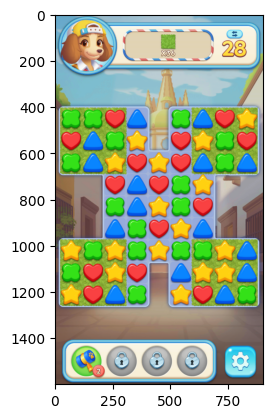

In [20]:
import re

def extract_numbers(input_string):
    # 정규 표현식을 사용하여 숫자만 추출
    numbers = re.findall(r'\d+', input_string)
    return int(numbers[0])


print(extract_numbers(map_source_images[10][0]))
plt.imshow(map_source_images[10][1])

In [21]:
map_dict = {extract_numbers(k):v for k,v in map_source_images}
map_dict = dict(sorted(map_dict.items()))
map_dict.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119])

In [22]:
import pandas as pd

mapsize = pd.read_csv('MPT/resource/MPT_mapsize.csv')
mapsize.set_index('Level', inplace=True)


def get_map_size(level):
    map_width = mapsize.loc[level,'Width']
    map_height = mapsize.loc[level,'Height']
    return map_width, map_height

for k in map_dict.keys():
    print(k, get_map_size(k), end=" ")

1 (np.int64(8), np.int64(8)) 2 (np.int64(8), np.int64(8)) 3 (np.int64(9), np.int64(9)) 4 (np.int64(9), np.int64(11)) 5 (np.int64(9), np.int64(9)) 6 (np.int64(9), np.int64(9)) 7 (np.int64(7), np.int64(9)) 8 (np.int64(9), np.int64(9)) 9 (np.int64(9), np.int64(9)) 10 (np.int64(9), np.int64(9)) 11 (np.int64(9), np.int64(9)) 12 (np.int64(9), np.int64(9)) 13 (np.int64(9), np.int64(9)) 14 (np.int64(8), np.int64(8)) 15 (np.int64(9), np.int64(9)) 16 (np.int64(9), np.int64(9)) 17 (np.int64(9), np.int64(9)) 18 (np.int64(9), np.int64(8)) 19 (np.int64(9), np.int64(10)) 20 (np.int64(9), np.int64(9)) 21 (np.int64(9), np.int64(9)) 22 (np.int64(9), np.int64(9)) 23 (np.int64(9), np.int64(8)) 24 (np.int64(9), np.int64(9)) 25 (np.int64(8), np.int64(10)) 26 (np.int64(9), np.int64(9)) 27 (np.int64(8), np.int64(9)) 28 (np.int64(8), np.int64(10)) 29 (np.int64(8), np.int64(10)) 30 (np.int64(9), np.int64(9)) 31 (np.int64(8), np.int64(10)) 32 (np.int64(8), np.int64(10)) 33 (np.int64(9), np.int64(9)) 34 (np.int64

In [23]:
move_count_box_pos = [(700, 105), (840,200)]
goal_box_pos = [(320, 80), (660, 190)]

In [24]:
map_dict[1].shape

(1600, 900, 3)

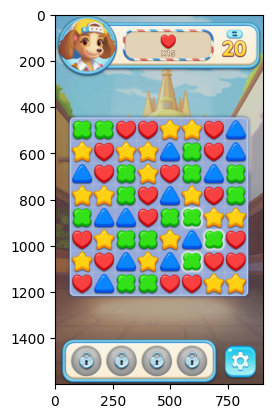

In [25]:
plt.imshow(map_dict[1])

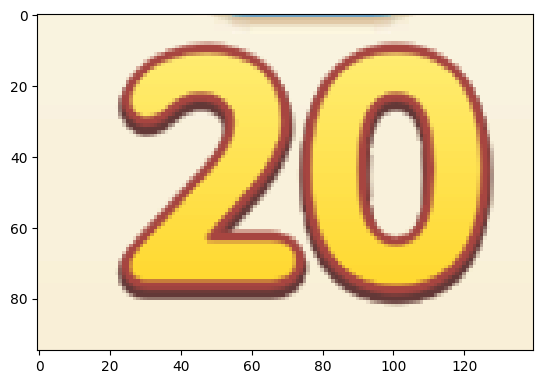

In [26]:
def cut_move_count_box(map_image, move_count_box_pos = move_count_box_pos):
    h, w = map_image.shape[:2]
    if h==1600 and w==900:
        return map_image[move_count_box_pos[0][1]:move_count_box_pos[1][1], move_count_box_pos[0][0]:move_count_box_pos[1][0]]
    
move_count_box = cut_move_count_box(map_dict[1])

plt.imshow(move_count_box)

In [27]:
from PIL import Image
import easyocr

reader = easyocr.Reader(['en'])

result = reader.readtext(move_count_box)


# for r in result:
#     print(r)
    
print(len(result))
print(result)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


1
[([[np.int32(15), np.int32(1)], [np.int32(137), np.int32(1)], [np.int32(137), np.int32(89)], [np.int32(15), np.int32(89)]], '20', np.float64(0.9998026798556747))]


[([[np.int32(135), np.int32(73)], [np.int32(207), np.int32(73)], [np.int32(207), np.int32(109)], [np.int32(135), np.int32(109)]], 'X15', np.float64(0.7510590194908899))]


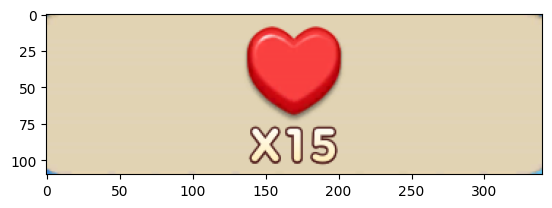

In [28]:
def cut_goal_box(map_image, goal_box_pos = goal_box_pos):
    h, w = map_image.shape[:2]
    if h==1600 and w==900:
        return map_image[goal_box_pos[0][1]:goal_box_pos[1][1], goal_box_pos[0][0]:goal_box_pos[1][0]]
    
goal_box = cut_goal_box(map_dict[1])

result = reader.readtext(goal_box)

len_goal = len(result)
for r in result:
    x1, y1 = r[0][0]
    x2, y2 = r[0][2]
    value = r[1]
    confidence = r[2]

print(result)

plt.imshow(goal_box)

In [29]:
goal_boxes = {}
for k, v in map_dict.items():
    goal_boxes[k] = cut_goal_box(v)

110


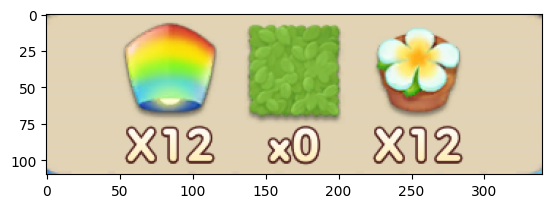

111


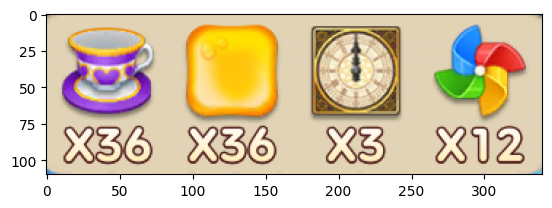

112


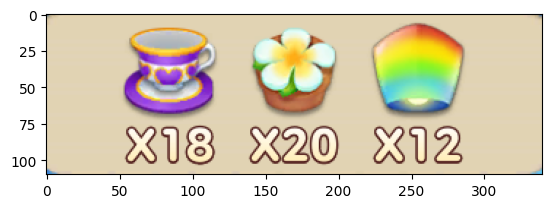

113


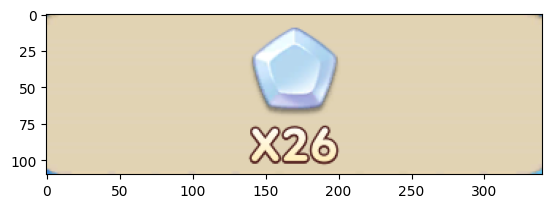

114


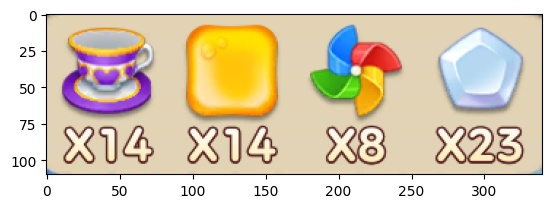

115


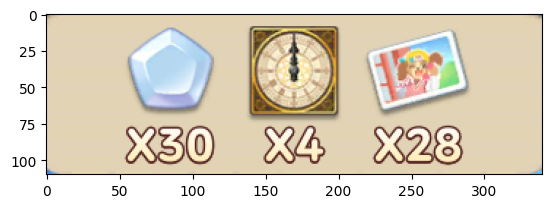

116


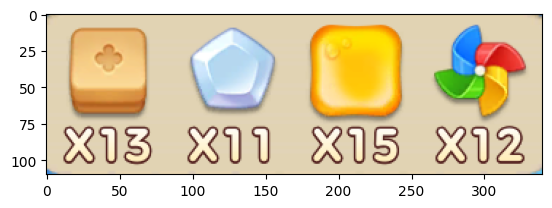

117


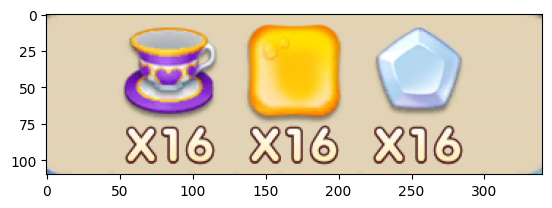

118


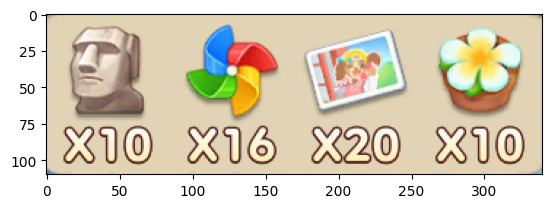

119


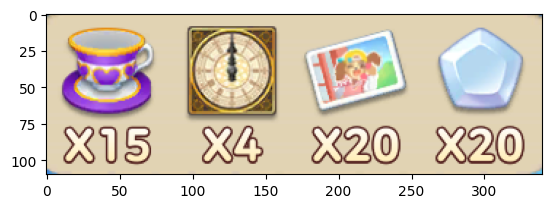

In [32]:
for k in list(goal_boxes.keys())[-10:]:
    print(k)
    plt.imshow(goal_boxes[k])
    plt.show()

In [112]:
goals = {}
troublemaker = []
for k, goal_box in goal_boxes.items():
    result = reader.readtext(goal_box)

    len_goal = len(result)
    goal_list = [(r[0][0][0], r[1]) for r in result]
    sorted(goal_list, key=lambda x: x[0])
    goal_list = [r[1] for r in goal_list]
    for r in goal_list:
        if ' ' in r:
            goal_list.remove(r)
            goal_list.extend(r.split(' '))
    try:
        goal_list = [int(r[1:].replace('L', '4').replace('l', '4').replace('b', '4').replace('s', '5').replace('S', '5').replace('o', '0').replace('O', '0')) for r in goal_list]
    except:
        troublemaker.append(k)
        goal_list = [r[1:].replace('L', '4').replace('l', '4').replace('b', '4').replace('s', '5').replace('S', '5').replace('o', '0').replace('O', '0') for r in goal_list]
    goals[k] = goal_list

print(len(troublemaker))
goals

0


{1: [15],
 2: [30, 30],
 3: [25, 25],
 4: [13],
 5: [30, 60],
 6: [42],
 7: [45],
 8: [25],
 9: [49],
 10: [36],
 11: [77],
 12: [18, 36],
 13: [4],
 14: [32, 4],
 15: [30, 12, 3],
 16: [30, 18],
 17: [49, 4],
 18: [9, 16, 4],
 19: [21, 36, 4],
 20: [0],
 21: [40],
 22: [50],
 23: [24, 45],
 24: [27, 40],
 25: [32, 20, 4],
 26: [17, 28],
 27: [16, 16, 4],
 28: [46, 16, 8],
 29: [24, 24, 35],
 30: [100],
 31: [56],
 32: [20, 24],
 33: [32, 32],
 34: [54, 50],
 35: [28, 3, 20],
 36: [27, 30],
 37: [24, 16, 4],
 38: [16, 24, 24, 4],
 39: [21, 30, 6],
 40: [0],
 41: [16],
 42: [36, 32],
 43: [7, 32],
 44: [20, 16, 30],
 45: [16, 4, 16],
 46: [16, 4, 100],
 47: [40, 40, 30],
 48: [16, 29],
 49: [28, 28, 30],
 50: [48, 4, 32, 16],
 51: [36],
 52: [25, 18],
 53: [36, 4],
 54: [25, 25, 28],
 55: [23, 28, 30],
 56: [12, 12, 16, 40],
 57: [20, 20, 20, 5],
 58: [5, 27, 34],
 59: [34, 16, 16, 20],
 60: [0],
 61: [74],
 62: [20, 18],
 63: [20, 25, 25],
 64: [20, 5, 14],
 65: [24, 22, 16, 8],
 66: [

In [105]:
move_count_boxes = {}
for k, v in map_dict.items():
    move_count_boxes[k] = cut_move_count_box(v)

In [113]:
move_counts = {}
troublemaker = []
for k, move_count_box in move_count_boxes.items():
    result = reader.readtext(move_count_box)

    if len(result) != 1:
        troublemaker.append(k)
        continue
    
    try:
        move_count = int(result[0][1].replace('o', '0').replace('O', '0'))
        # .replace('L', '4').replace('l', '4').replace('b', '4').replace('s', '5').replace('S', '5').replace('o', '0').replace('O', '0'))
    except:
        troublemaker.append(k)
        move_count = result[0][1].replace('o', '0').replace('O', '0')

    move_counts[k] = move_count

print(len(troublemaker))
move_counts

0


{1: 20,
 2: 20,
 3: 20,
 4: 20,
 5: 20,
 6: 21,
 7: 21,
 8: 23,
 9: 20,
 10: 28,
 11: 28,
 12: 26,
 13: 22,
 14: 23,
 15: 27,
 16: 28,
 17: 23,
 18: 24,
 19: 22,
 20: 20,
 21: 23,
 22: 25,
 23: 25,
 24: 28,
 25: 27,
 26: 23,
 27: 21,
 28: 28,
 29: 25,
 30: 26,
 31: 22,
 32: 20,
 33: 25,
 34: 25,
 35: 22,
 36: 25,
 37: 25,
 38: 30,
 39: 26,
 40: 20,
 41: 20,
 42: 24,
 43: 22,
 44: 26,
 45: 24,
 46: 28,
 47: 26,
 48: 22,
 49: 30,
 50: 25,
 51: 22,
 52: 23,
 53: 25,
 54: 26,
 55: 27,
 56: 26,
 57: 23,
 58: 25,
 59: 28,
 60: 20,
 61: 22,
 62: 25,
 63: 25,
 64: 22,
 65: 25,
 66: 26,
 67: 28,
 68: 22,
 69: 27,
 70: 25,
 71: 23,
 72: 24,
 73: 25,
 74: 28,
 75: 28,
 76: 23,
 77: 25,
 78: 27,
 79: 27,
 80: 26,
 81: 20,
 82: 23,
 83: 23,
 84: 26,
 85: 30,
 86: 24,
 87: 25,
 88: 27,
 89: 23,
 90: 20,
 91: 20,
 92: 24,
 93: 25,
 94: 27,
 95: 29,
 96: 27,
 97: 26,
 98: 27,
 99: 30,
 100: 25,
 101: 26,
 102: 24,
 103: 24,
 104: 26,
 105: 30,
 106: 27,
 107: 27,
 108: 29,
 109: 30,
 110: 27,
 111: 25

In [115]:
goal_boxes[1][:75,:].shape

(75, 340, 3)

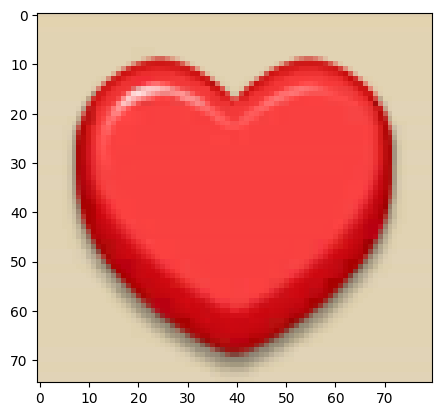

In [116]:
plt.imshow(goal_boxes[1][:75,130:210])

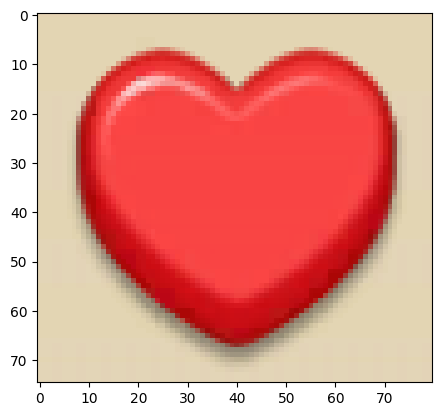

In [120]:
plt.imshow(goal_boxes[5][:75,87:167])

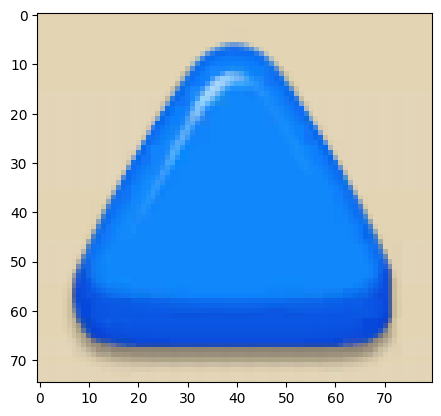

In [121]:
plt.imshow(goal_boxes[5][:75,173:253])

In [123]:
level = 5
small_cell_width = 80
small_cll_interval = 6

if len(goals[level]):
    170 - small_cell_width//2

[30, 60]

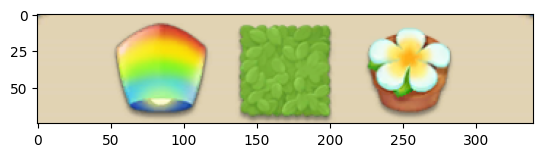

In [38]:
plt.imshow(goal_boxes[110][:75,:])

44 124 130 210 216 296


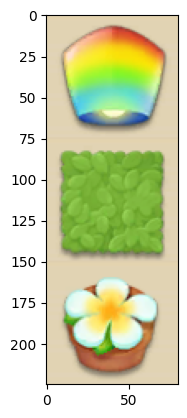

In [122]:
dim = 80
x1=44
x2=x1+dim+6
x3=x1+2*(dim+6)
print(x1, x1+dim, x2, x2+dim, x3, x3+dim)
plt.imshow(np.concatenate((goal_boxes[110][:75,x1:x1+dim], goal_boxes[110][:75,x2:x2+dim], goal_boxes[110][:75,x3:x3+dim])))

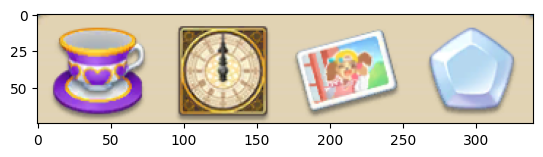

In [66]:
plt.imshow(goal_boxes[119][:75,:])

0 80 86 166 172 252


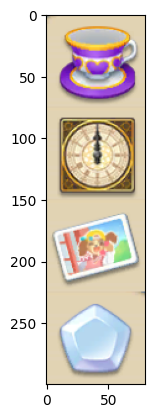

In [70]:
dim = 80
x1 = 0
x2 = dim+6
x3 = 2*(dim+6)
x4 = 3*(dim+6)
print(x1, x1+dim, x2, x2+dim, x3, x3+dim)
plt.imshow(np.concatenate((goal_boxes[119][:75,x1:x1+dim], goal_boxes[119][:75,x2:x2+dim], goal_boxes[119][:75,x3:x3+dim], goal_boxes[119][:75,x4:x4+dim])))

In [ ]:
plt.imshow(goal_boxes[110][:75,128:210])

In [10]:
%pip show easyocr

Name: easyocr
Version: 1.7.2
Summary: End-to-End Multi-Lingual Optical Character Recognition (OCR) Solution
Home-page: https://github.com/jaidedai/easyocr
Author: Rakpong Kittinaradorn
Author-email: r.kittinaradorn@gmail.com
License: Apache License 2.0
Location: C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: ninja, numpy, opencv-python-headless, Pillow, pyclipper, python-bidi, PyYAML, scikit-image, scipy, Shapely, torch, torchvision
Required-by: 
Note: you may need to restart the kernel to use updated packages.
